# Chem 18: Introductory Data Science for Modern Chemists

> Instructor: [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:nya@prpr.zip)
>
> The Christian F. Weichman Department of Chemistry, Lastoria Royal College of Science

This material is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

Welcome to Chem 18: Introductory Data Science for Modern Chemists!

In this course, you will learn how to use modern computational tools – particularly the Python programming language – to process, analyze, and display data. As chemists, data is at the heart of your work: it supports your hypotheses, validates your findings, and helps you communicate your results effectively. Being able to process and visualize data clearly is an essential skill for the future of chemical research.

This course is designed as a self-paced, interactive tutorial. You will work through these Jupyter Notebooks on your own, learning by doing. Many of the concepts will feel familiar, and you'll discover that data processing is not as difficult as it may first seem. Our goal is to make the learning process efficient for both you and us, while giving you practical skills you can apply immediately in your studies and research.

A note on grading: this course is offered on a Pass/Fail basis. Your focus should be on exploring, experimenting, and building confidence with the tools – not on chasing points.

Take your time, enjoy the process, and let's begin the journey into data-driven chemistry!

## Example 1: A Five-Minute Reaction in Solution

Suppose you are running a reaction below:

$$\ce{t-BuBr + H2O -> t-BuOH + HBr}$$

This is a simple solvolysis reaction, which generates $\ce{HBr}$ as one of the products. We all know that the rate-determining step is the first step, which is the generation of carbocation:

$$\ce{t-BuBr <=> t-Bu+ + Br-}$$

(We are just to simplify this reaction, so we suppose that no backward reaction happens.) This is a first-order reaction with respect to the reactant, $\ce{t-BuBr}$. The rate law is

$$\frac{d[\ce{t-BuOH}]}{dt} = \frac{d[\ce{HBr}]}{dt} = -\frac{d[\ce{t-BuBr}]}{dt} = k [\ce{t-BuBr}]$$

Integrating the expression above, we obtain

$$\ln[\ce{t-BuOH}] = -kt + \ln[\ce{t-BuOH}]_0$$

Now we have a set of data, and we want to plot this data and find $k$. It's definitely easy to do by hand, or you can use software like Excel to do this fit. However, we want to introduce you a much more powerful tool, which is this interactive notebook. Run the code below by pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or <kbd>Shift</kbd> + <kbd>Return</kbd> on Mac) to execute. See what's happened?

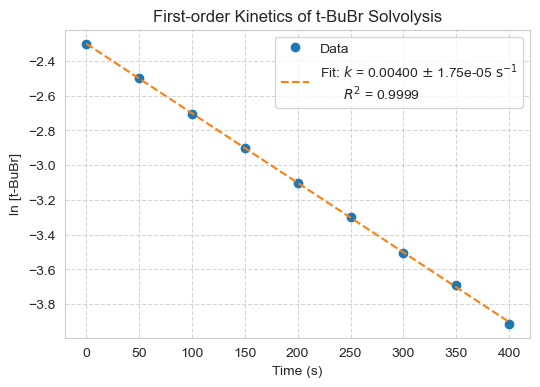

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
data = np.loadtxt('./assets/reaction_data.csv', delimiter=',', skiprows=1)
time = data[:,0]
conc = data[:,1]

# Take ln of concentrations
ln_conc = np.log(conc)

# Linear fit with covariance
coeffs, cov = np.polyfit(time, ln_conc, 1, cov=True)
slope, intercept = coeffs
k = -slope

# Standard deviations from diagonal of covariance
slope_std, intercept_std = np.sqrt(np.diag(cov))

# Plot data + fit
plt.figure(figsize=(6,4))
plt.plot(time, ln_conc, label='Data', linestyle='', marker='o')
plt.plot(time, slope*time + intercept, linestyle='--',
         label=(rf'''Fit: $k$ = {k:.5f} $\pm$ {slope_std:.2e} $\mathrm{{s}}^{{-1}}$
      $R^2$ = {r2_score(ln_conc, slope*time + intercept):.4f}'''))
plt.xlabel('Time (s)')
plt.ylabel('ln [t-BuBr]')
plt.grid(linestyle='--', alpha=0.8)
plt.legend()
plt.title('First-order Kinetics of t-BuBr Solvolysis')
plt.show()

This is a very simple example, but it shows how powerful this tool is. You can use it to explore your data, find the best fit, and evaluate the quality of your fit.

We can even use less code to plot the same data, by using another library called [Seaborn](https://seaborn.pydata.org/).

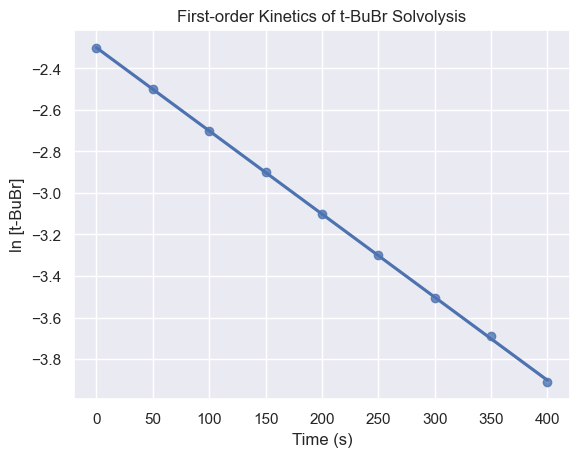

In [2]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.regplot(x=time, y=ln_conc)
plt.xlabel('Time (s)')
plt.ylabel('ln [t-BuBr]')
plt.title('First-order Kinetics of t-BuBr Solvolysis')
plt.show()

## Example 2: Particle in a 2D Box

In quantum mechanics, the [particle in a box](https://en.wikipedia.org/wiki/Particle_in_a_box) (PIB) model is a common model for illustrating quantum mechanical concepts. Mathematically, it is given by

$$\Psi(x, y, t) = \sqrt{\frac{4}{L_xL_y}} \sin \left( \frac{n_x \pi x}{L_x} \right) \sin \left(\frac{n_y \pi y}{L_y} \right) \cos \left(\frac{E_{n_x,n_y} t}{\hbar} \right)$$

where

$$E_{n_x,n_y} = \frac{\pi^2\hbar^2}{2m} \left[ \left(\frac{n_x}{L_x}\right)^2 + \left(\frac{n_y}{L_y}\right)^2 \right]$$

$\hbar = \frac{h}{2\pi}$ is the [reduced Planck constant](https://en.wikipedia.org/wiki/Planck_constant#Reduced_Planck_constant), $L_x$ and $L_y$ are the lengths of the box, and $n_x$ and $n_y$ are the quantum numbers.

However, it is not easy to think about a "2D wave," so we usually choose to visualize it and make it animate. The script `pib2d.py` generates an interactive 2D PIB model. We will use the following code to implement it. You can play with the sliders to adjust the corresponding parameters, namely `t`, `nx`, `ny`, and see how the wave changes.

In [3]:
import pib2d
pib2d.show_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.5235987755982988),…

<function pib2d.make_plot(t: float = 0, nx: int = 1, ny: int = 1)>

## Course Syllabus

This course is organized into several modules, each focusing on different aspects of data processing and analysis using Python. Here's a brief overview of what you can expect:
- **Basics of Python Programming**: Learn the fundamentals of Python, including data types, variables, operators, control structures, functions, and modules.
- **Data Visualization**: Explore libraries like Matplotlib and Seaborn to create informative and visually appealing plots.
- **Scientific Calculation on Python**: Dive into numerical computing with NumPy and SciPy, covering array manipulations, mathematical functions, and statistical analysis.
- **Symbolic Mathematics**: Understand how to perform algebraic manipulations, calculus, and equation solving symbolically.
- **Numerical Methods**: Learn numerical methods like root finding, solving differential equations and linear algebra problems, and numerical integration.
- **Signal Processing**: Learn common signal processing techniques, including filtering, Fourier transforms, etc.
- **Optimization**: Learn how to optimize functions and models using optimization algorithms beyond basic methods and evaluate their performance.
- **Quantum Chemistry**: Learn how to perform quantum chemistry calculations using python libraries like PySCF and Psi4.
- **Machine Learning**: Learn basic machine learning models and their applications in chemistry.
- **Chemoinformatics**: Understand fundamental concepts of chemoinformatics and integrate previous tools to perform cheminformatics analysis in the areas like drug design, reaction discovery, etc.
- **Advanced Topics**: Depending on the pace of the class, we may explore additional topics such as web scraping, database management, software engineering, large language model in chemistry, etc.

## How to Use This Notebook

To run this notebook, you need an appropriate environment. This section provides a step-by-step guide to installing and running JupyterLab, our recommended editor.

### Setting up Environments

JupyterLab is a web-based interactive development environment for code and data. In this course, we will use JupyterLab to run and interact with our Python code. JupyterLab is a part of the [Anaconda](https://www.anaconda.com/) distribution, which is a popular Python distribution that includes many commonly used scientific packages. The swiftest way to download Anaconda is following [Anaconda's official download page](https://www.anaconda.com/download/success), which skips the account registration step and provides a direct download link.

<img src="./assets/anaconda_download_page.png" alt="Anaconda download page" width="50%" style="display=block; margin:auto"/>

The left button downloads Anaconda, while the right button downloads Miniconda. Anaconda is a full distribution that can take up at least 5 GB of disk space. If your computer has limited storage, consider using Miniconda instead. Miniconda is a minimal distribution that only includes Python, conda, and a few essential utilities. It requires less than 500 MB of space, but you will need to install additional packages manually as needed.

If you have any questions about details, check out the [official tutorial of Anaconda](https://www.anaconda.com/docs/getting-started/getting-started) for reference.

After installing Anaconda, you can see the Anaconda Navigator, which is a graphical user interface for managing your Anaconda environments. Opening the Anaconda Navigator, you can find the JupyterLab application. Click the "Launch" button to launch JupyterLab.

<img src="./assets/anaconda_navigator.png" alt="Anaconda Navigator" width="50%" style="display=block; margin:auto"/>

If you want to use a Python environment other than Anaconda, you may need to install JupyterLab and other dependencies manually. Fortunately, we have provided a minimal dependency list in the `requirements.txt` file. You can install the dependencies by running the following command in the terminal.

```shell
pip install -r requirements.txt
```

After installing the dependencies, you can start JupyterLab by running the following command.

```shell
jupyter lab
```

It will open a browser window and show the JupyterLab interface (usually at <http://localhost:8888/lab>).

### Using JupyterLab

JupyterLab provides a flexible and intuitive user interface for working with notebooks, which is a little bit like [Visual Studio Code](https://code.visualstudio.com/) (VS Code). You can read the [JupyterLab user guide](https://jupyterlab.readthedocs.io/en/stable/user/interface.html) to learn more about JupyterLab's features. Here let's take a brief look at the interface.

<img src="./assets/jupyterlab_interface.png" alt="Interface of JupyterLab" width="50%" style="display=block; margin:auto"/>

- The **menu bar** at the top of JupyterLab has top-level menus that expose actions available in JupyterLab with their keyboard shortcuts.
- The **left sidebar** contains the file browser, kernel monitor, table of contents, and extension manager.
- The **main area** contains the notebook editor, which allows you to write and run code.
- The **right sidebar** contains the metadata inspector and debugger.
- The **status bar** at the bottom of the screen shows the current notebook, kernel, and other information.

#### Components of a Notebook

A notebook consists of a series of cells, which are mainly divided into code cells and Markdown cells. To create a cell, you need to select the cell directly above the location where you want to create it. A blue vertical line will appear on the left side of the selected cell. Then, you can click the "+" button in the toolbar to create a new cell below the selected cell.

<img src="./assets/main_insert_below.png" alt="Create cell" width="50%" style="display=block; margin:auto"/>

Code cells are used to write and execute Python code. As we mentioned in Example 1, you can execute a code cell by pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or <kbd>Shift</kbd> + <kbd>Return</kbd> on Mac), or clicking the "Run" button in the toolbar.

<img src="./assets/main_run_cell.png" alt="Run cell" width="50%" style="display=block; margin:auto"/>

A code cell may contain the output of the code, which is displayed below the cell. The output can be text, images, or other media. When you select a code cell with output, the blue line on the left side will break at the boundary between the cell and the output.

<img src="./assets/code_cell.png" alt="Code cell output" width="50%" style="display=block; margin:auto"/>

Markdown cells can render rich styles through simple syntax which we will learn later.

<img src="./assets/markdown_cell.png" alt="Markdown cell" width="50%" style="display=block; margin:auto"/>

To edit a Markdown cell, you can double-click the cell into edit mode. If you finished editing, you can "execute" it (remember the shortcut or button) to render the Markdown text.

<img src="./assets/markdown_edit.png" alt="Edit Markdown cell" width="50%" style="display=block; margin:auto"/>

By the way, for any button you are interested in, hover your cursor over it to see a description and the corresponding shortcut (if any). Furthermore, you can change the cell type (code, markdown, or raw text) using the drop-down menu in the toolbar.

<img src="./assets/toolbar_widgets.png" alt="Toolbar widgets" width="50%" style="display=block; margin:auto"/>

When selecting a cell, its upper right corner appears some small widgets. Each corresponds to a cell operation listed below.

| Widget                                             | Description                          | Default Shortcut                                 |
|----------------------------------------------------|--------------------------------------|--------------------------------------------------|
| ![Duplicated cell](assets/cell_duplicate.png)      | Duplicate the current cell           | None                                             |
| ![Move cell up](assets/cell_move_up.png)           | Move the current cell up             | <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Up</kbd>   |
| ![Move cell down](assets/cell_move_down.png)       | Move the current cell down           | <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Down</kbd> |
| ![Insert cell above](assets/cell_insert_above.png) | Insert a cell above the current cell | <kbd>A</kbd>                                     |
| ![Insert cell below](assets/cell_insert_below.png) | Insert a cell below the current cell | <kbd>B</kbd>                                     |
| ![Delete cell](assets/cell_delete.png)             | Delete the current cell              | <kbd>D</kbd>, <kbd>D</kbd> (double press)        |

Besides keyboard shortcuts or buttons, you can also drag and drop the left side of a cell to reorder them. Furthermore, click the left side of cells while pressing <kbd>Shift</kbd> to select multiple cells, and then you can move them together.

#### Menu Bar

Now let's take a closer look at the menu bar. The menu bar provides full control over the interface and notebooks. Here are some key features you should know before you start using JupyterLab.

The File menu contains actions for opening and saving notebooks, as well as for creating new notebooks. We can even export our notebook to a variety of formats. Here are some important shortcuts and functionalities:
- <kbd>Ctrl</kbd>+<kbd>S</kbd> is used to save your notebook, although you can enable auto-save in settings.
- <kbd>Alt</kbd>+<kbd>W</kbd> is used to close the current notebook, since <kbd>Ctrl</kbd>+<kbd>W</kbd> is already used on browser to close the current tab.
- The submenu "Save and Export Notebook As" allows you to save your notebook in various formats, including HTML, PDF, and Markdown.
- To create a new notebook, expand the "New" submenu and select "Notebook".

<img src="./assets/menu_file.png" alt="File menu" width="50%" style="display=block; margin:auto"/>

The Edit menu contains actions for editing notebooks, including cut, copy, paste, and undo/redo. Here are some important shortcuts and functionalities:
- Like many text editors, <kbd>Ctrl</kbd>+<kbd>Z</kbd> and <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Z</kbd> are used to undo and redo actions inside a cell.
- Correspondingly, those shortcuts without <kbd>Ctrl</kbd> are used for cell operations. For example:
    - <kbd>Z</kbd> is used to undo the last cell operation.
    - <kbd>Shift</kbd>+<kbd>Z</kbd> is used to redo the last reverted cell operation.
    - <kbd>X</kbd>, <kbd>C</kbd>, and <kbd>V</kbd> are used to cut, copy, and paste cells.

<img src="./assets/menu_edit.png" alt="Edit menu" width="50%" style="display=block; margin:auto"/>

The Run menu contains actions for running and debugging notebooks, including running all cells, running a cell, and restarting the kernel. In most cases, you only need to remember that <kbd>Shift</kbd>+<kbd>Enter</kbd> is used to run a cell. If you want to render all Markdown cells or run all cells without restarting the kernel, you need to access it in this menu.

<img src="./assets/menu_run.png" alt="Run menu" width="50%" style="display=block; margin:auto"/>

The Kernel menu contains actions for managing kernels, including restarting, changing, and shutting down the kernel. For now, you can consider the kernel as the background process that runs your code and renders your Markdown cells. If you encounter any issues while running your code, you can try to restart the kernel, clear the output, and run the cell again. You can find the corresponding options in this menu.

<img src="./assets/menu_kernel.png" alt="Kernel menu" width="50%" style="display=block; margin:auto"/>

### About Jupyter Notebook

Some of you may hear about Jupyter Notebook, which is also a web-based interactive development environment. Before JupyterLab was released, Jupyter Notebook was the default interface for Jupyter. Now it is no longer recommended to use Jupyter Notebook, since the latest version of Jupyter Notebook is based on JupyterLab, which may eventually be merged into JupyterLab.

<img src="./assets/jupyter_notebook_interface.png" alt="Jupyter Notebook interface" width="50%" style="display=block; margin:auto"/>

### Other IDEs

There are many other IDEs for Python, such as [PyCharm](https://www.jetbrains.com/pycharm/), [Visual Studio Code](https://code.visualstudio.com/), and [Spyder](https://www.spyder-ide.org/). Each of them is designed for different purposes, and you can choose the one that best suits your needs.

## Markdown Language

Markdown is a lightweight markup language that uses simple plain-text symbols (e.g. `#`, `*`, <code>`</code>) to create formatted documents (headings, lists, links, code, etc.). Jupyter supports Markdown cells that render this syntax (including LaTeX math, images, and basic HTML) inline, letting you mix readable documentation with executable code and outputs. Let's introduce them with some examples.

Each subsection will show the original Markdown code in a code block, followed by the rendered result.

### Basic Syntax

```markdown
Markdown supports basic syntax like **bold**, *italic*, and ~~strikethrough~~. Using `_` instead of `*` can also render __bold__ and _italic_ text. The **_bold and italic_** effects can be combined.

A simple line break is treated as a space when rendering.
A blank line separates paragraphs.
Two spaces at the end of a line result in a line break in the paragraph.
```

Markdown supports basic syntax like **bold**, *italic*, and ~~strikethrough~~. Using `_` instead of `*` can also render __bold__ and _italic_ text. The **_bold and italic_** effects can be combined.

A simple line break is treated as a space when rendering.
A blank line separates paragraphs.
Two spaces at the end of a line result in a line break in the paragraph.

### Headings

```markdown
# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6
```

Headings are titles at various levels. A line leading with `#` is considered a heading. The number of `#` indicates the level of the heading. In order not to break the layout, let's put a screenshot of the rendered Markdown here.

<img src="./assets/markdown_headings.png" alt="Headings in Markdown" width="50%" style="display=block; margin:auto"/>

### Quotes

```markdown
> A line starting with `>` is considered a quote.
>
> Quotes can span multiple lines, as long as the lines all begin with `>`.
>
> > Quotes can be nested.
> > Other **syntaxes** can be _used_ inside ~~quotes~~.
```

> A line starting with `>` is considered a quote.
>
> Quotes can span multiple lines, as long as the lines all begin with `>`.
>
> > Quotes can be nested.
> > Other **syntaxes** can be _used_ inside ~~quotes~~.

### Lists

```markdown
- This is an unordered list
- Starts with `-`, `+`, or `*`
    - Can be nested
    - Only needs to keep the same indentation

1. This is an ordered list
2. Starts with `1.`, `2.`, …
    1. Can also be nested
    1. Can share the same starting number

* Each level
    1. of nested list
        + is independent
            1. include numbering
```

- This is an unordered list
- Starts with `-`, `+`, or `*`
    - Can be nested
    - Only needs to keep the same indentation

1. This is an ordered list
2. Starts with `1.`, `2.`, …
    1. Can also be nested
    1. Can share the same starting number

* Each level
    1. of nested list
        + is independent
            1. include numbering

### Links and Images

```markdown
Markdown supports links and images. According to [Wikipedia page of Markdown](https://en.wikipedia.org/wiki/Markdown), links are divided into two parts: the text to be displayed and the link itself. The text to be displayed is surrounded by square brackets (`[]`), while the link itself is surrounded by parentheses (`()`).

The syntax for images is similar to links. The only differences are that the image code is started with `!`, and the text surrounded by square brackets is the caption of the image.

![Markdown mark](./assets/markdown_mark.svg)
```

Markdown supports links and images. According to [Wikipedia page of Markdown](https://en.wikipedia.org/wiki/Markdown), links are divided into two parts: the text to be displayed and the link itself. The text to be displayed is surrounded by square brackets (`[]`), while the link itself is surrounded by parentheses (`()`).

The syntax for images is similar to links. The only differences are that the image code is started with `!`, and the text surrounded by square brackets is the caption of the image.

![Markdown mark](./assets/markdown_mark.svg)

### Tables

```markdown
| Syntax        | Keyword        | Example           |
|---------------|----------------|-------------------|
| Bold          | `**`           | **Bold**          |
| Italic        | `_`            | _Italic_          |
| Strikethrough | `~~`           | ~~Strikethrough~~ |
| Inline code   | <code>`</code> | `Inline code`     |
| Inline LaTeX  | `$`            | $\hat{H} = E$     |
```

Tables are a common way to display data, which has a little bit of complicated syntax.
- Each row of a table consists of columns separated and surrounded by `|`.
- The first row of a table is considered as the header.
- The second row of a table is considered as the delimiter.
- The rest rows are the body of the table, which also contains `|`-separated columns.

| Syntax        | Keyword        | Example           |
|---------------|----------------|-------------------|
| Bold          | `**`           | **Bold**          |
| Italic        | `_`            | _Italic_          |
| Strikethrough | `~~`           | ~~Strikethrough~~ |
| Inline code   | <code>`</code> | `Inline code`     |
| Inline LaTeX  | `$`            | $\hat{H} = E$     |

### Codes

``````markdown
Markdown supports two types of code environments. The `inline codes` are surrounded by single backticks (<code>`</code>), while code blocks are surrounded by triple backticks (<code>```</code>). The language name right behind the triple backticks is optional, which can be used to specify the syntax highlighting.

```python
if __name__ == "__main__":
    print("Code block")
```
``````

Markdown supports two types of code environments. An `inline code` is surrounded by single backticks (<code>`</code>), while a code block is surrounded by triple backticks (<code>```</code>). The language name right behind the triple backticks is optional, which can be used to specify the syntax highlighting.

```python
if __name__ == "__main__":
    print("Code block")
```

### LaTeX

[LaTeX](https://www.latex-project.org/) is a powerful typesetting language with flexible extension capabilities. Many academic journals support and recommend using their LaTeX templates for submissions. However, setting up LaTeX environments on your own machine may be a painful process. Therefore, we recommend using [Overleaf](https://www.overleaf.com/) to write your LaTeX documents. It also provides an easy-to-learn [tutorial for LaTeX](https://www.overleaf.com/learn) that is both broad and in-depth.

```markdown
Markdown cells in Jupyter supports LaTeX extensions, mainly for mathematical formulae. You can use single dollar signs (`$`) to render an inline formula, like $\hat{H}\psi = E\psi$, and double dollar signs (`$$`) to render a display-sized formula:

$$
-\frac{\hbar^2}{2m}\nabla^2\Psi + \hat{V}\Psi = i\hbar\frac{\partial}{\partial t} \Psi
$$
```

Markdown cells in Jupyter supports LaTeX extensions, mainly for mathematical formulae. You can use single dollar signs (`$`) to render an inline formula, like $\hat{H}\psi = E\psi$, and double dollar signs (`$$`) to render a display-sized formula:

$$
-\frac{\hbar^2}{2m}\nabla^2\Psi + \hat{V}\Psi = i\hbar\frac{\partial}{\partial t} \Psi
$$

### Inline HTML

```markdown
For the features that Markdown does not support, you can use <a href="https://developer.mozilla.org/en-US/docs/Web/HTML">HTML</a> tags. For example, the `<u>` tag is for <u>underlined</u> text. As we have seen before, the `<code>` tag is for <code>inline code</code>.
```

For the features that Markdown does not support, you can use <a href="https://developer.mozilla.org/en-US/docs/Web/HTML">HTML</a> tags. For example, the `<u>` tag is for <u>underlined</u> text. As we have seen before, the `<code>` tag is for <code>inline code</code>.

## Acknowledgement

This lesson draws on ideas from the following sources:

- [Anaconda](https://www.anaconda.com/) for providing an out-of-the-box Python environment
- [Project Jupyter](https://jupyter.org/) for providing an interactive code editor
- GenAI for making paragraphs and codes(・ω< )★
- And so many resources on Reddit, StackExchange, etc.!